In [6]:
import math
import subprocess
import mpmath
from os import path
import numpy as np
import matplotlib.pyplot as plt

In [11]:
MAX_ULP_ERROR = 3.5

def correctLog(x):
  return mpmath.log(x)

def testLog(x):
  ret = subprocess.run([path.join((path.abspath('')), path.pardir, "build/tests/logf"),
                        str(x)], capture_output=True, text=True, check=True)
  return float(ret.stdout.strip())

def getUlp(mpf):
  f = np.float32(mpf)
  next = np.nextafter(f, np.float32(np.inf))
  return (next - f).item()

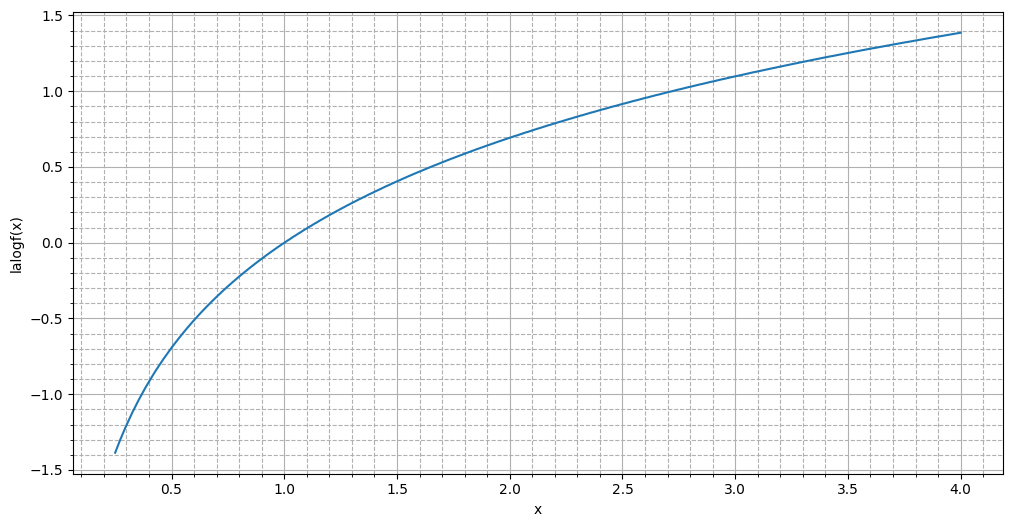

In [18]:
def main():
  x = np.linspace(0.25, 4, 1000)
  y = [testLog(v) for v in x]
  plt.figure(figsize=(12, 6))
  plt.plot(x, y)
  plt.grid(which='major')
  plt.grid(which='minor', linestyle='--')
  plt.minorticks_on()
  plt.xlabel('x')
  plt.ylabel('lalogf(x)')
  plt.savefig('graphs/lalogf.png')

if __name__ == "__main__":
  main()